In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("F:\\reza\\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Data yang digunakan adalah data diabetes, jika seseorang tersebut tidak terkena diabetes maka nilainya 0
* Jika orang tersebut terkena diabetes maka nilainya 1


In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
import seaborn as sns

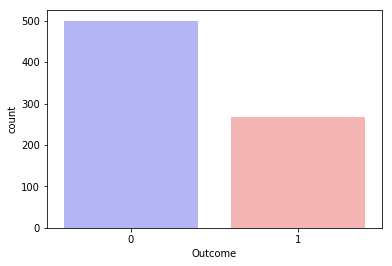

In [13]:
sns.countplot(x="Outcome", data=df, palette="bwr")
plt.show()

In [14]:
countNoDiabetes = len(df[df.Outcome == 0])
countHaveDiabetes = len(df[df.Outcome == 1])
print("Percentage of Patients Have Diabetes: {:.2f}%".format((countNoDiabetes / (len(df.Outcome))*100)))
print("Percentage of Patients Havent Diabetes: {:.2f}%".format((countHaveDiabetes / (len(df.Outcome))*100)))

Percentage of Patients Haven't Diabetes: 65.10%
Percentage of Patients Have Diabetes: 34.90%


In [15]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


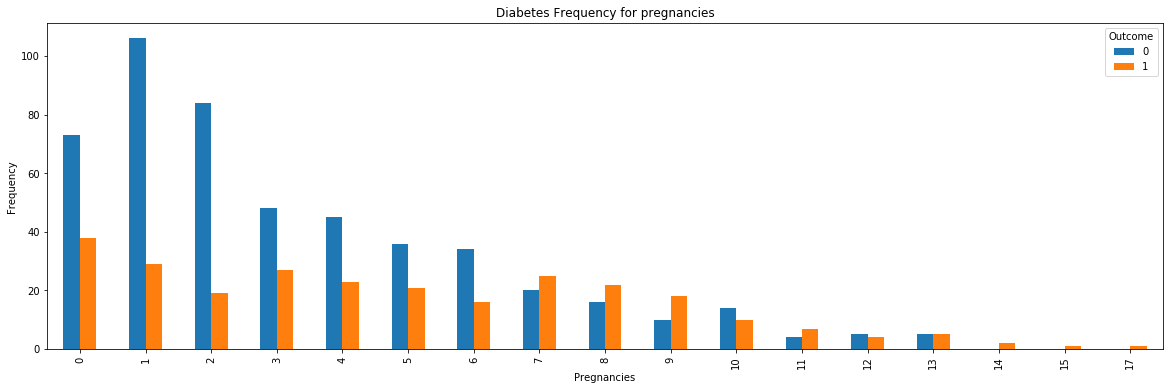

In [16]:
pd.crosstab(df.Pregnancies,df.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.savefig('Diabetesfrequencybypregnancies.png')
plt.show()

* Tampilan histogram dari data x = pregnancies.
* Warna biru menunjukkan bahwa tidak terkena diabetes
* Warna orange menunjukkan terkena diabetes

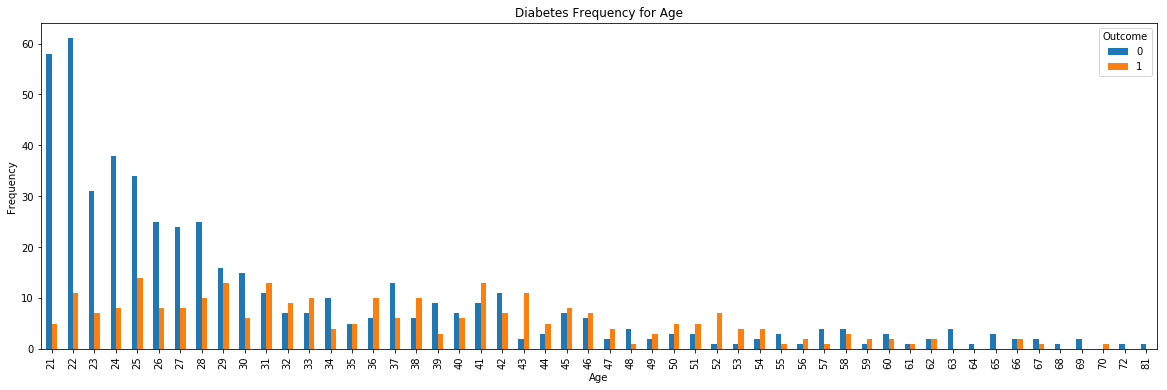

In [19]:
pd.crosstab(df.Age,df.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('DiabetesfrequencybyAge.png')
plt.show()

* Histogram dengan melihat umur
* Orang terkena diabetes paling banyak pada umur 41 tahun dengan frekuensi 10 orang

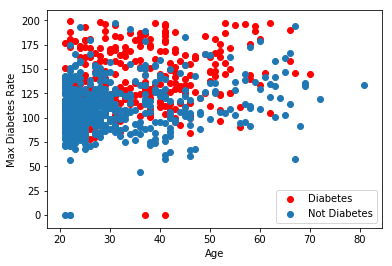

In [21]:
plt.scatter(x=df.Age[df.Outcome==1], y=df.Glucose[(df.Outcome==1)], c="red")
plt.scatter(x=df.Age[df.Outcome==0], y=df.Glucose[(df.Outcome==0)])
plt.legend(["Diabetes", "Not Diabetes"])
plt.xlabel("Age")
plt.ylabel("Max Diabetes Rate")
plt.show()

* Sebaran data dari orang yang terkena diabetes dengan melihat dari usia, penyebaran data cukup merata dengan melihat orang yang terkena diabetes lebih sedikit daripada yang terkena diabetes.
* Usia paling rawan terkena diabetes adalah 40 - 50 tahun


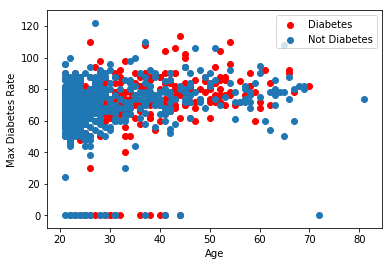

In [23]:
plt.scatter(x=df.Age[df.Outcome==1], y=df.BloodPressure[(df.Outcome==1)], c="red")
plt.scatter(x=df.Age[df.Outcome==0], y=df.BloodPressure[(df.Outcome==0)])
plt.legend(["Diabetes", "Not Diabetes"])
plt.xlabel("Age")
plt.ylabel("Max Diabetes Rate")
plt.show()

* Orang yang terkena diabetes dan memiliki tekanan darah tidak terlalu banyak, karena dari gambar lebih dominan yang tidak terkena yaitu warna biru
* Tekanan darah dari orang yang terkena diabetes paling banyak antara 80 - 100 dan pada usia 50 - 60 tahun


In [59]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Dari analisis deskriptif diatas bisa dilihat masing - masing variabel independen memiliki nilai
* Untuk nilai maksimal dari pregnancies adalah 17
* Untuk nilai maksimal dari Glucose adalah 199
* Dan jumlah data yang ada sebanyak 768

In [24]:
y = df.Outcome.values
x_data = df.drop(['Outcome'], axis = 1)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


### Normalize Data
<br>
<br>
<img src="https://1.bp.blogspot.com/-n06ZvyeI2HM/WrMW4KervoI/AAAAAAAAC7k/rktq848B-3IZdYrQzsEVaQe3agq1GzruwCLcBGAs/s640/min%2Bmax.jpg" width="400px"/>

In [30]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [32]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

* Normalisasi data ditunjukkan untuk meminimalisir hasil analisis yang tidak relevan atau tidak valid. Sehingga normalisasi data sangat diperlukan dalam analisis regresi

In [33]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [34]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

* Karena variabel dependen ini bersifat kategori ( diabetes dan Non diabetes) 
* Scatter plot yang di dapatkan tidak menunjukan sebaran data yang mengumpul dan mendekati garis


### Forward and Backward 
<br>
<img src="http://umardanny.com/wp-content/uploads/2014/03/depthfirstsearch.jpg" width="500px"/>

In [35]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

* Metode backward dan forward digunakan untuk melihat fakta - fakta yang sama dari masing - masing variabel terdekat.
* Metode backward dan forward ini dipengaruhi oleh tiga macam teknik penelusuran yaitu : Deep -First Search, Breadth firsh search, Best first search


### Cost Function
<br>
<img src="https://i.stack.imgur.com/XbU4S.png" width="500px"/>

### Gradient Descent
<br>
<img src="https://i.stack.imgur.com/pYVzl.png" width="500px"/>

In [36]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

* Metode ini bekerja dengan memulai dari sebuah tebakan awal (boleh acak) dan secara iteratif tebakan ini diperbaiki berdasarkan suatu aturan yang melibatkan gradien/turunan pertama dari fungsi yang ingin diminimumkan.

In [37]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

* Karena untuk mengalisa data dengan nilai y lebih dari 1 maka menggunakan metode regresi logistik dan salah satu syaratnya adalah data harus normal.

In [38]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

* Regresi logistik adalah salah satu regresi non linear karena tidak membutuhkan asumsi - asumsi dari regresi. 
* diatas adalah bentuk dari persamaan regresi logistik

iteration: 100
cost: 0.5673525628197928


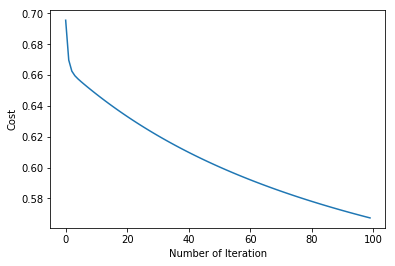

Manuel Test Accuracy: 76.62%


In [39]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [41]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 80.52%


F:\program files\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* Akurasi dari model yang di dapat mendapatkan nilai dari 80.52% 

**KNN Algorithm**
<br>
<img src="https://www.python-course.eu/images/k_NN.png"/>

In [42]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 74.68%


* Algoritma KNN diklasifikan berdasarkan mayoritas dari kategori pada KNN. Tujuan dari algoritma ini adalah mengklasifikasikan obyek baru bedasarkan atribut dan training sample. Classifier tidak menggunakan model apapun untuk dicocokkan dan hanya berdasarkan pada memori
* Algoritma metode KNN sangatlah sederhana, bekerja berdasarkan jarak terpendek dari query instance ke training sample untuk menentukan KNN-nya


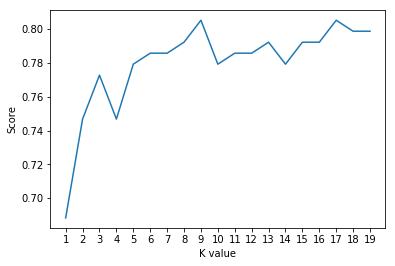

Maximum KNN Score is 80.52%


In [43]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

**Support Vector Machine Algorithm**
<br>
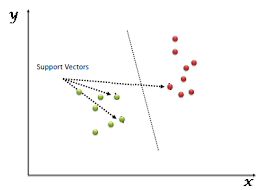

* teknik SVM digunakan untuk menemukan fungsi pemisah(klasifier) yang optimal yang bisa memisahkan dua set data dari dua kelas yang berbeda. Penggunaan teknik machine learning tersebut, karena performansinya yang meyakinkan dalam memprediksi kelas suatu data baru.


In [44]:
from sklearn.svm import SVC

In [45]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 81.17%


F:\program files\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**Naive Bayes Algorithm**
<br>
<img src="https://s3.ap-south-1.amazonaws.com/techleer/204.png" width="500px"/>

* asumsi yg sangat kuat (naïf) akan independensi dari masing-masing kondisi / kejadian.
* Naive Bayes Classifier bekerja sangat baik dibanding dengan model classifier lainnya
* Keuntungan penggunan adalah bahwa metoda ini hanya membutuhkan jumlah data pelatihan (training data) yang kecil untuk menentukan estimasi parameter yg diperlukan dalam proses pengklasifikasian

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 79.22%


** Decision Tree Algoritm**
<br>
<img src="http://dataaspirant.com/wp-content/uploads/2017/01/B03905_05_01-compressor.png" width="500px"/>

* model prediksi menggunakan struktur pohon atau struktur berhirarki
* menemukan hubungan tersembunyi antara sejumlah calon variabel input dengan sebuah variabel target. Decision tree memadukan antara eksplorasi data dan pemodelan, sehingga sangat bagus sebagai langkah awal dalam proses pemodelan bahkan ketika dijadikan sebagai model akhir dari beberapa teknik lain.

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 79.22%


In [48]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 81.82%


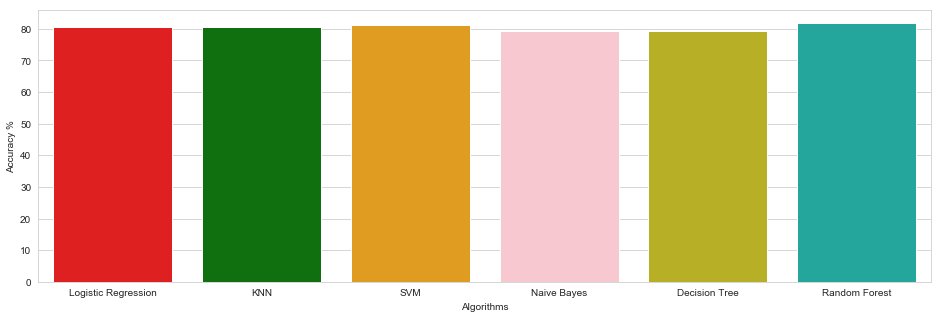

In [51]:
colors = ["red", "green", "orange", "pink","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

* Nilai  yang di  dapatkan dari beberapa uji dengan menggunakan logistic, knn, svm, naive bayes, decision tree, dan random forest mendapatkan hasil akurasi diatas 50 %, Bisa dikatakan rata - ratanya sekitar 80%. 


In [52]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [53]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


* Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining atau Sistem Pendukung Keputusan. Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi
* True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN). Nilai True Negative (TN) merupakan jumlah data negatif yang terdeteksi dengan benar, sedangkan False Positive (FP) merupakan data negatif namun terdeteksi sebagai data positif. Sementara itu, True Positive (TP) merupakan data positif yang terdeteksi benar. False Negative (FN) merupakan kebalikan dari True Positive, sehingga data posifit, namun terdeteksi sebagai data negatif.



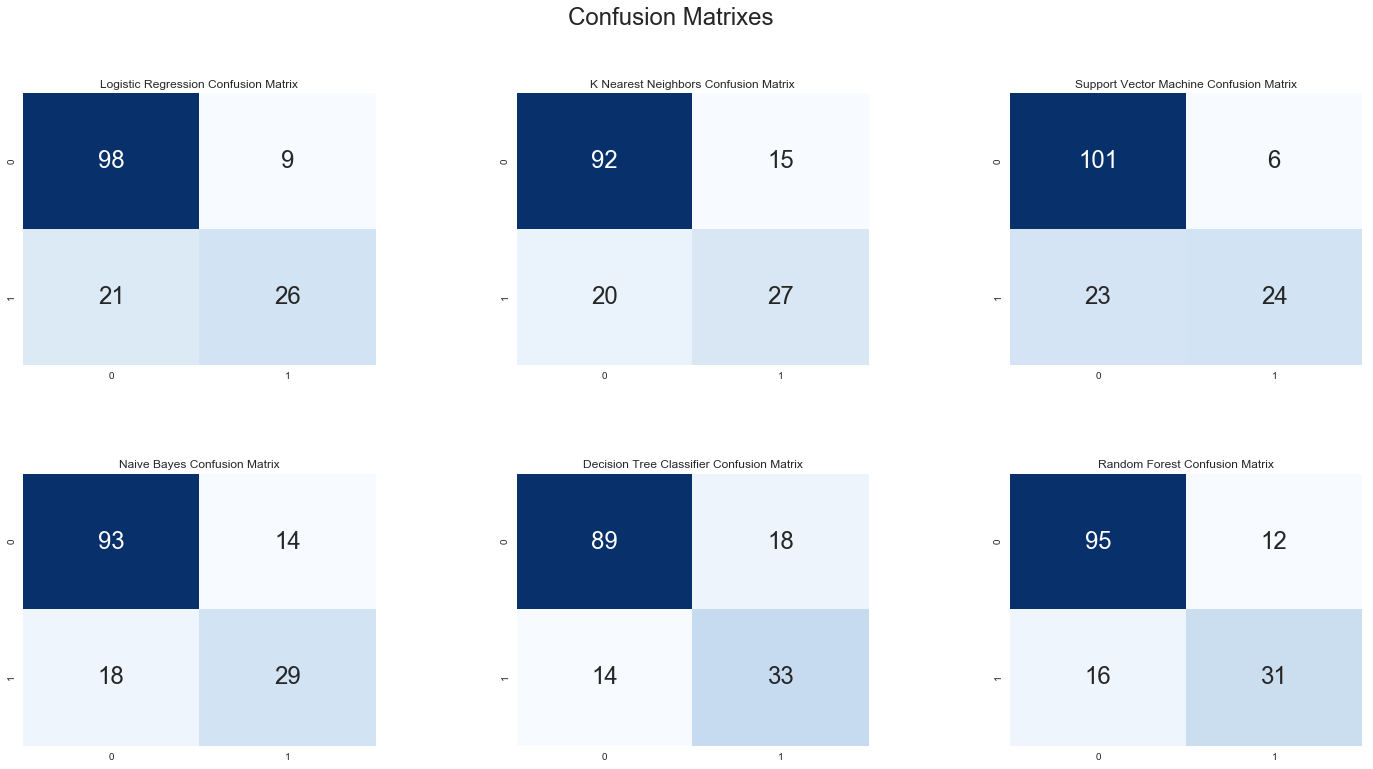

In [54]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()